# PW4-Unsupervised machine learning: Kmeans, Hclustering, DBSCAN

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import cluster
import sklearn as sk
from sklearn import datasets
import pandas as pd
from scipy.cluster.hierarchy import linkage
import seaborn as sbn
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

## All Clustering Method

### Random Clustering

In [8]:
def randomClustering(syn, k):
    return np.random.randint(0, k, syn.shape[0])

### Agglomerative Clustering

In [9]:
def agglomerativeClustering(x, k):
    d = sc.spatial.distance.pdist(x)
    l = sc.cluster.hierarchy.linkage(d)
    return sc.cluster.hierarchy.fcluster(l, k, criterion='maxclust')

### Kmeans

In [104]:
def kMeans(dataset, k, nbIterations=1000, show=False):
    centroids = np.random.random((k, dataset.shape[1]))*np.max(dataset)
    labels = np.zeros((dataset.shape[0]))
    for i in range(nbIterations):
        if show:
            plt.scatter(dataset[:, 0], dataset[:, 1], c=labels);
            plt.scatter(centroids[:, 0], centroids[:, 1], s=200);
            plt.show();
        cd = sc.spatial.distance.cdist(centroids, dataset)
        pastLabels = labels
        for d in range(dataset.shape[0]):
            labels[d] = np.argmin(cd[:, d])
        for c in range(k):
            centroids[c, :] = np.mean(dataset[labels==c, :], axis=0)
        if (np.all(pastLabels == labels)):
            break
    return labels

### DBSCAN

In [79]:
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(data)

## Rand Index

In [80]:
def rand_index(ref, est):
    num = 0
    if len(ref) != len(est):
        print('arrays must be of the same size')
        error()
    for k in range(len(ref)):
        for l in range(len(ref)-k-1):
            if (ref[k]==ref[k+l+1] and est[k]==est[k+l+1]) or (ref[k]!=ref[k+l+1] and est[k]!=est[k+l+1]) :
                num += 1
    den = len(ref)*(len(ref)-1)/2
    return num/den

# Exercise 10 

### Data loading and ploting

In [90]:
dataset= sk.datasets.load_iris()
data_labels=dataset.target
data=dataset.data
display(data,data_labels)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

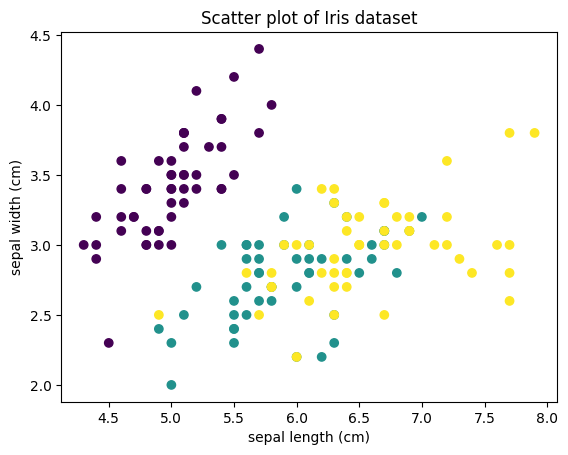

In [84]:
plt.scatter(data[:, 0], data[:, 1], c=data_labels);
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.title("Scatter plot of Iris dataset")
plt.show();

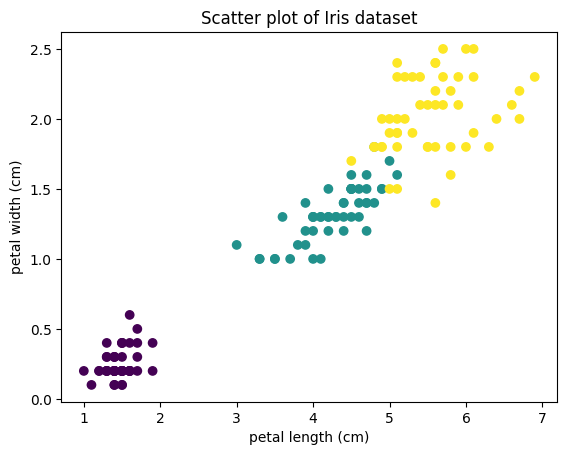

In [85]:
plt.scatter(data[:, 2], data[:, 3], c=data_labels);
plt.xlabel(dataset.feature_names[2])
plt.ylabel(dataset.feature_names[3])
plt.title("Scatter plot of Iris dataset")
plt.show();

### Cluster hierarchy dendrogram

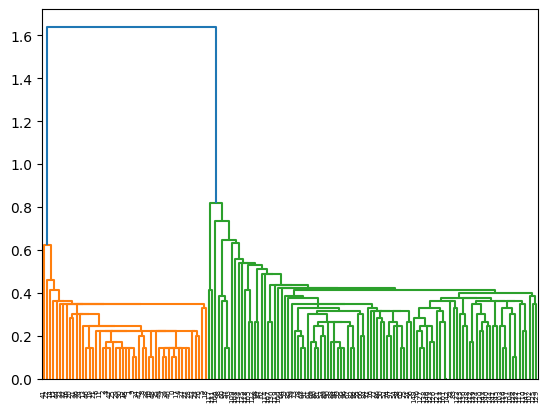

In [91]:
euc_distance_matrix = sc.spatial.distance.pdist(data)
l = sc.cluster.hierarchy.linkage(euc_distance_matrix)
dn = sc.cluster.hierarchy.dendrogram(l)

### K-Means plot

In [116]:
labels = kMeans(data, 4)

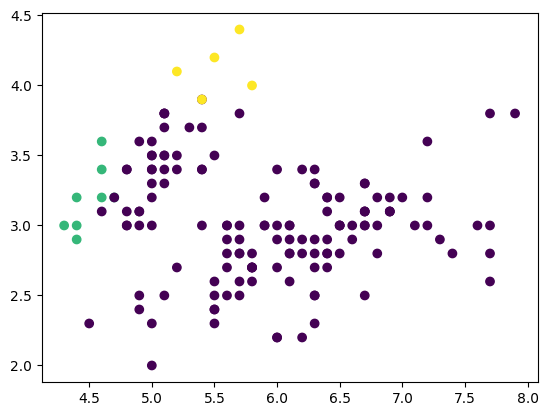

In [140]:
plt.scatter(data[:, 0],data[:, 1], c=labels);
plt.show()

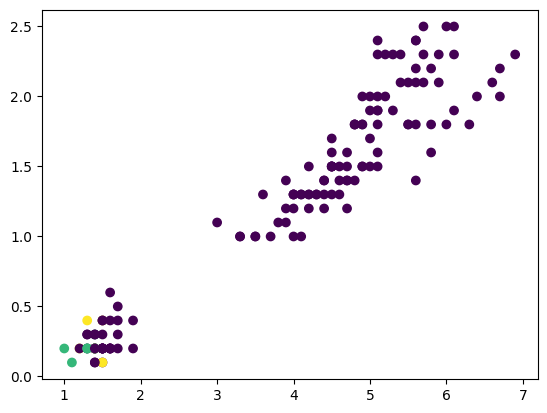

In [156]:
plt.scatter(data[:,2],data[:, 3], c=labels);
plt.show()

## Performance Analysis for exercice 10

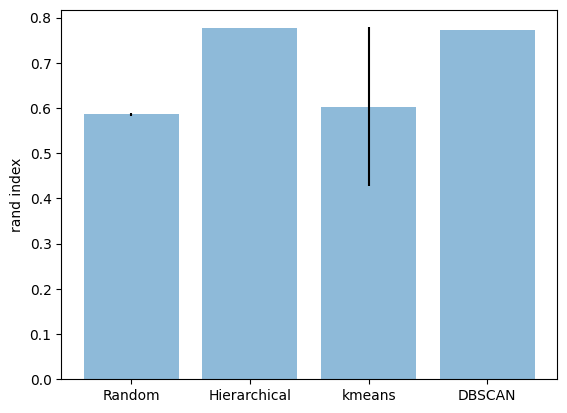

In [82]:
ri = np.zeros((4, 100))
for k in range(100):
    ri[0, k] = rand_index(data_labels, randomClustering(data, 4))
    ri[1, k] = rand_index(data_labels, agglomerativeClustering(data, 4))
    ri[2, k] = rand_index(data_labels, kMeans(data, 4))
    ri[3, k] = rand_index(data_labels, DBSCAN(eps=0.5, min_samples=5).fit(data).labels_)
x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri, axis=1), yerr = np.std(ri, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()

## Exercise 11

### Data loading and ploting

In [97]:
dataset_2= sk.datasets.load_breast_cancer()
data_labels_2=dataset_2.target
data_2=dataset_2.data
display(data_2,data_2.shape,data_labels_2)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

(569, 30)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

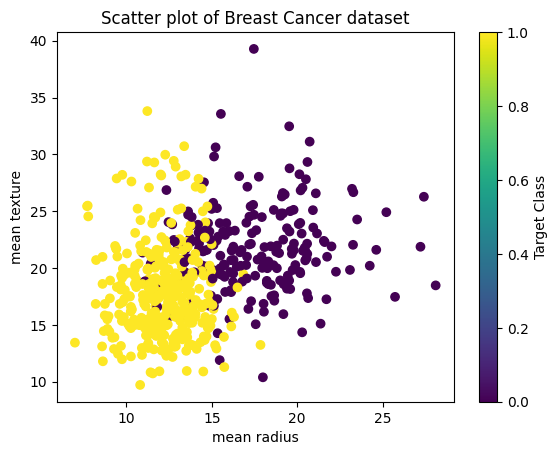

In [102]:
plt.scatter(data_2[:, 0], data_2[:, 1], c=data_labels_2)
plt.xlabel(dataset_2.feature_names[0])
plt.ylabel(dataset_2.feature_names[1])
plt.title("Scatter plot of Breast Cancer dataset")
plt.colorbar(label="Target Class")

### Cluster hierarchy dendrogram

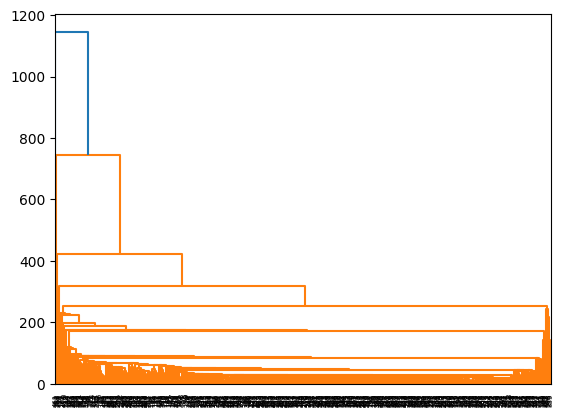

In [103]:
euc_distance_matrix_2 = sc.spatial.distance.pdist(data_2)
l_2 = sc.cluster.hierarchy.linkage(euc_distance_matrix_2)
dn_2 = sc.cluster.hierarchy.dendrogram(l_2)

### K-Means plot

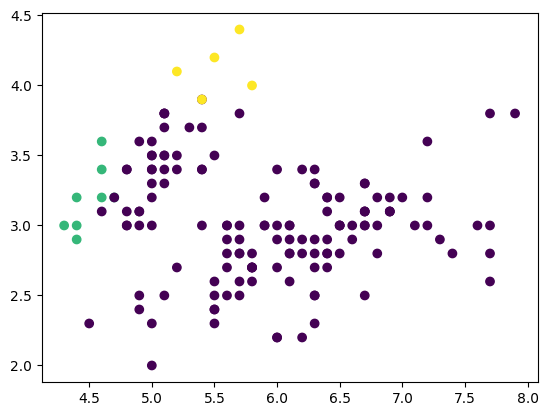

In [158]:
labels_2 = kMeans(data_2, 4)
plt.scatter(data[:, 0],data[:, 1], c=labels);
plt.show()

## Performance Analysis for exercise 11

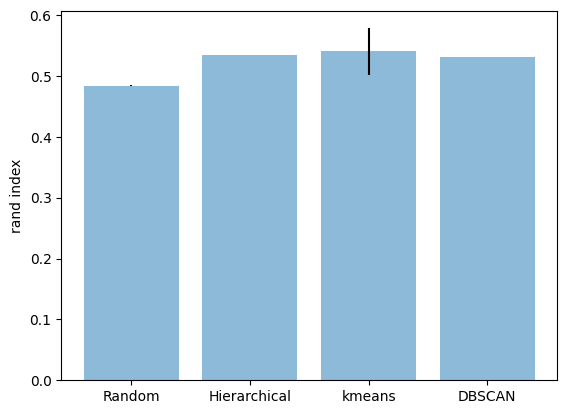

In [159]:
ri = np.zeros((4, 100))
for k in range(100):
    ri[0, k] = rand_index(data_labels_2, randomClustering(data_2, 4))
    ri[1, k] = rand_index(data_labels_2, agglomerativeClustering(data_2, 4))
    ri[2, k] = rand_index(data_labels_2, kMeans(data_2, 4))
    ri[3, k] = rand_index(data_labels_2, DBSCAN(eps=0.5, min_samples=5).fit(data_2).labels_)
x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri, axis=1), yerr = np.std(ri, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()